# 作业1.2

In [1]:
gROOT->ProcessLine(".L ppac.C"); 
gROOT->ProcessLine("ppac t"); 

(ppac &) @0x7f33eafb6018


# 写入文件VETO.root

In [2]:
//t.Loop(); 

In [3]:
TFile *File = new TFile("VETO.root"); //打开ROOT文件
if (File->IsZombie()) {
std::cout << "Error opening file" << std::endl; 
exit(-1); 
}
TTree *vetotree = (TTree*)File->Get("treeVETO"); //得到名字为“tree”的TTree指针
Int_t veto_itu, veto_itd, veto_iqu, veto_iqd, veto_pid, itu, itd, iqu, iqd, pid; 
vetotree->SetBranchAddress("veto_itu", &veto_itu);  
vetotree->SetBranchAddress("veto_itd", &veto_itd); 
vetotree->SetBranchAddress("veto_iqu", &veto_iqu); 
vetotree->SetBranchAddress("veto_iqd", &veto_iqd); 
vetotree->SetBranchAddress("veto_pid", &veto_pid); 
vetotree->SetBranchAddress("itu", &itu);  
vetotree->SetBranchAddress("itd", &itd); 
vetotree->SetBranchAddress("iqu", &iqu); 
vetotree->SetBranchAddress("iqd", &iqd); 
vetotree->SetBranchAddress("pid", &pid); 

# 查看一下时间在非边界处的数据

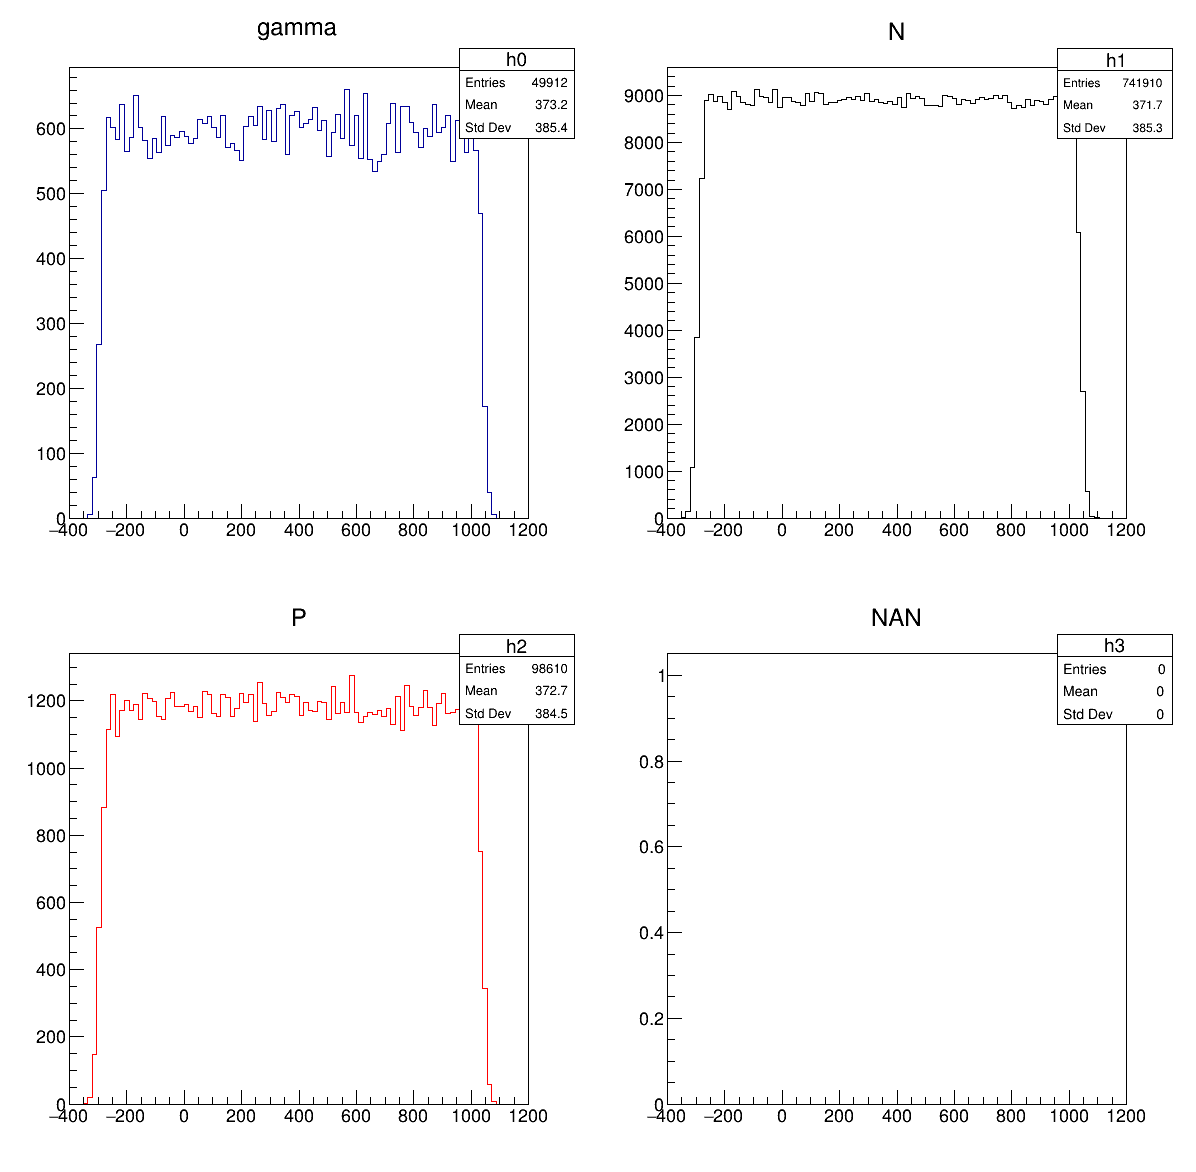

In [4]:
TH1D *h0 = new TH1D("h0", "gamma", 100, -400, 1200); 
vetotree->Draw("itd-itu>>h0", "pid==0 && itu!=4095 && itd!=4095", "goff"); 
TH1D *h1 = new TH1D("h1", "N", 100, -400, 1200); 
vetotree->Draw("itd-itu>>h1", "pid==1 && itu!=4095 &&itd != 4095", "goff"); 
TH1D *h2 = new TH1D("h2", "P", 100, -400, 1200); 
vetotree->Draw("itd-itu>>h2", "pid==2 && itu!=4095 &&itd != 4095", "goff"); 
TH1D *h3 = new TH1D("h3", "NAN", 100, -400, 1200); 
vetotree->Draw("itd-itu>>h3", "pid==3 && itu!=4095 &&itd != 4095", "goff"); 

TCanvas *c1 = new TCanvas("c1", "c1", 1200, 1200); 
c1->Divide(2,2);
h1->SetLineColor(kBlack);
h2->SetLineColor(kRed); 
h3->SetLineColor(kMagenta);  
c1->cd(1); 
h0->Draw(); 
c1->cd(2); 
h1->Draw();
c1->cd(3); 
h2->Draw(); 
c1->cd(4); 
h3->Draw(); 
c1->Draw(); 

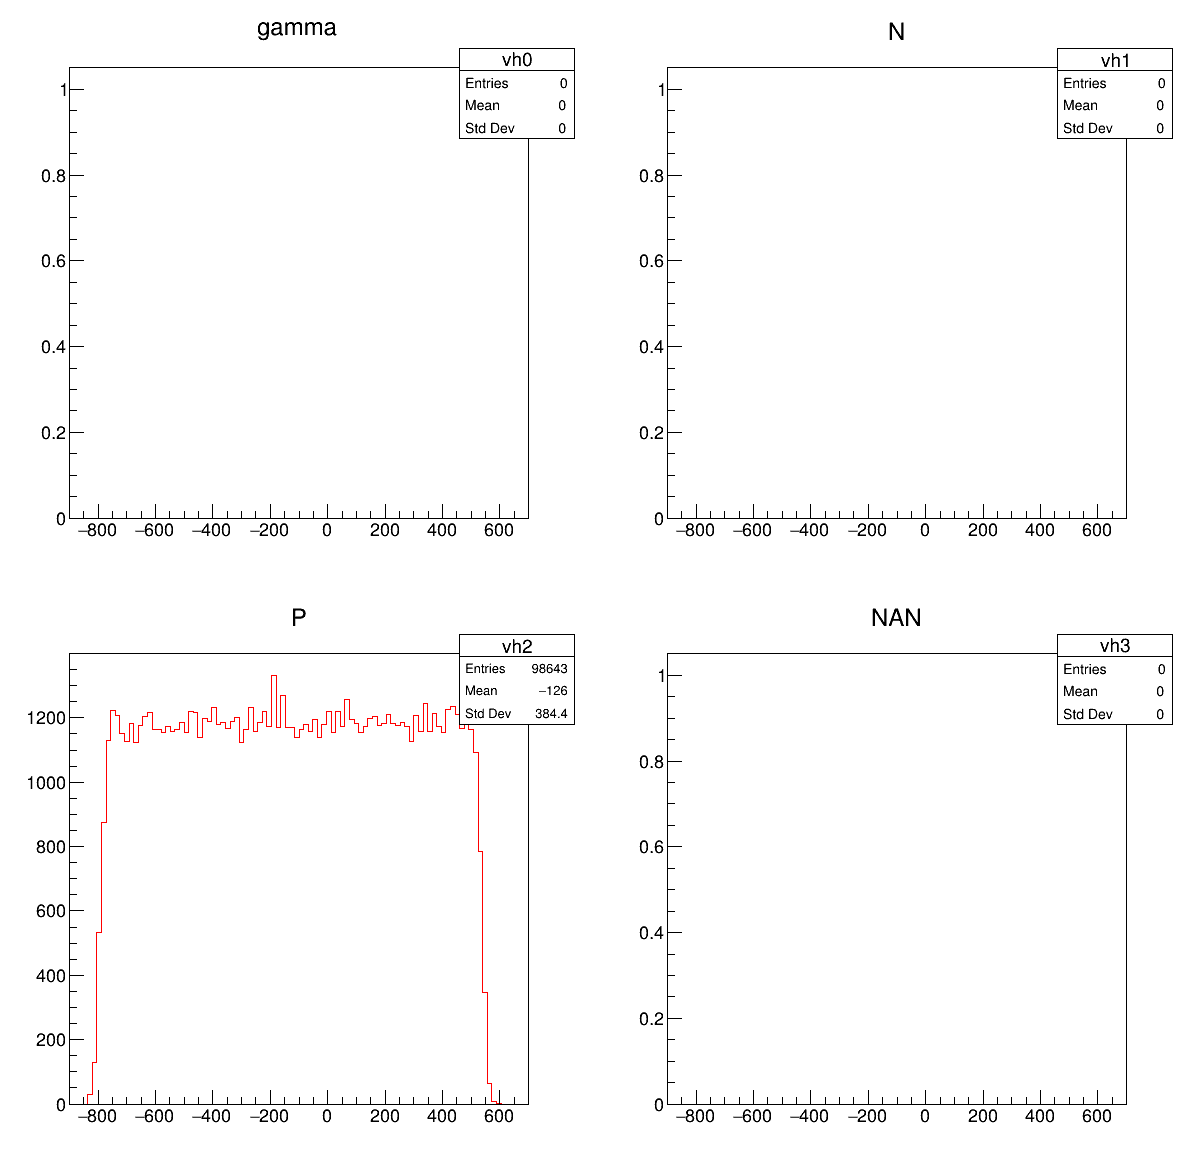

In [5]:
TH1D *vh0 = new TH1D("vh0", "gamma", 100, -900, 700); 
vetotree->Draw("veto_itd-veto_itu>>vh0", "veto_pid==0 && veto_itu!=4095 && veto_itd!=4095", "goff"); 
TH1D *vh1 = new TH1D("vh1", "N", 100, -900, 700); 
vetotree->Draw("veto_itd-veto_itu>>vh1", "veto_pid==1 && veto_itu!=4095 && veto_itd != 4095", "goff"); 
TH1D *vh2 = new TH1D("vh2", "P", 100, -900, 700); 
vetotree->Draw("veto_itd-veto_itu>>vh2", "veto_pid==2 && veto_itu!=4095 && veto_itd != 4095", "goff"); 
TH1D *vh3 = new TH1D("vh3", "NAN", 100, -900, 700); 
vetotree->Draw("veto_itd-veto_itu>>vh3", "veto_pid==3 && veto_itu!=4095 && veto_itd != 4095", "goff"); 

TCanvas *vc1 = new TCanvas("vc1", "vc1", 1200, 1200); 
vc1->Divide(2,2); 
vc1->cd(1); 
vh0->Draw(); 
vh1->SetLineColor(kBlack);
vh2->SetLineColor(kRed); 
vh3->SetLineColor(kMagenta); 
vc1->cd(2); 
vh1->Draw();
vc1->cd(3); 
vh2->Draw(); 
vc1->cd(4); 
vh3->Draw(); 
vc1->Draw(); 

# 很明显在中子探测器中，itu,itd不等于4095时，没有轻粒子。而在veto探测器中只有质子。想要过滤出中子的数据，可以简单的删掉这两者。

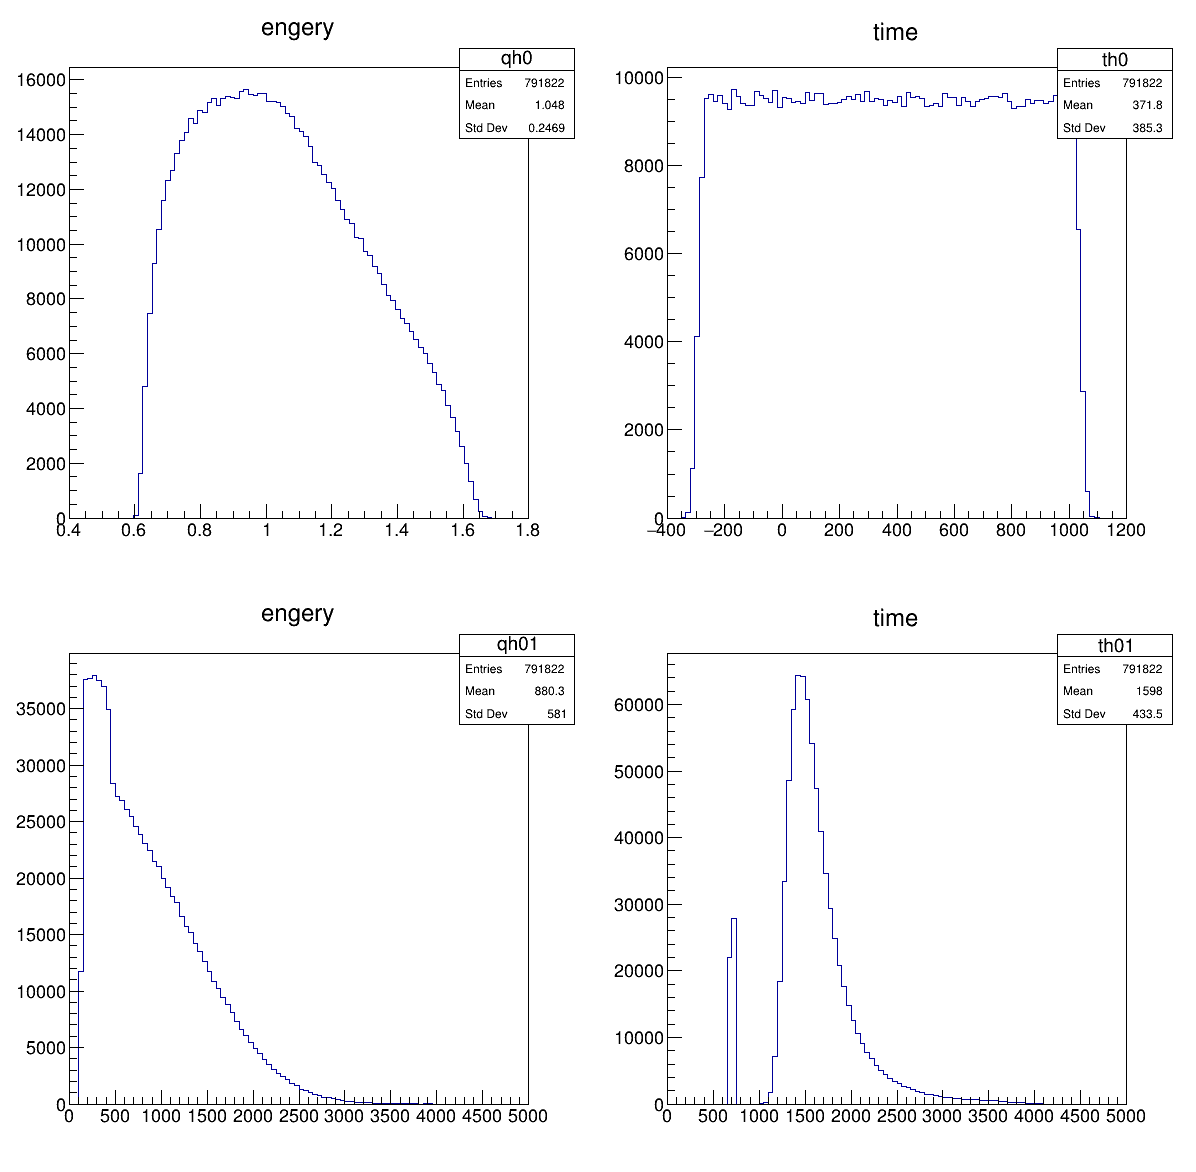

In [6]:
TH1D *th0 = new TH1D("th0", "time", 100, -400, 1200); 
TH1D *qh0 = new TH1D("qh0", "engery", 100, 0.4, 1.8); 
TH1D *th01 = new TH1D("th01", "time", 100, 0, 5000); 
TH1D *qh01 = new TH1D("qh01", "engery", 100, 0, 5000); 

Double_t quqd; 
Long64_t Nentry = vetotree->GetEntries(); 
for(Long64_t jentry = 0; jentry < Nentry; jentry++){
    vetotree->GetEntry(jentry); 

    if(itu!=4095 && itd!= 4095 && veto_itu == 4095 &&veto_itd ==4095 ){
        th0->Fill(itd-itu); 
        quqd = Double_t(iqu)/iqd; 
        qh0->Fill(quqd); 
        th01->Fill((itd+Double_t(itu))/2); 
        qh01->Fill(TMath::Sqrt(iqu*Double_t(iqd))); 
    }
}

TCanvas *qc1 = new TCanvas("qc1", "qc1", 1200, 1200); 
qc1->Divide(2,2); 
qc1->cd(1); 
qh0->Draw();
qc1->cd(2); 
th0->Draw(); 
qc1->cd(3); 
qh01->Draw();
qc1->cd(4); 
th01->Draw(); 
qc1->Draw();

# 还有光子没有去除，还需要尽量去除光子。在时间上很难直接看出区别，还需要对时间加以处理。如上第四图，光子的$\frac{itu+itd}{2}$明显独立了出来，选择去除。

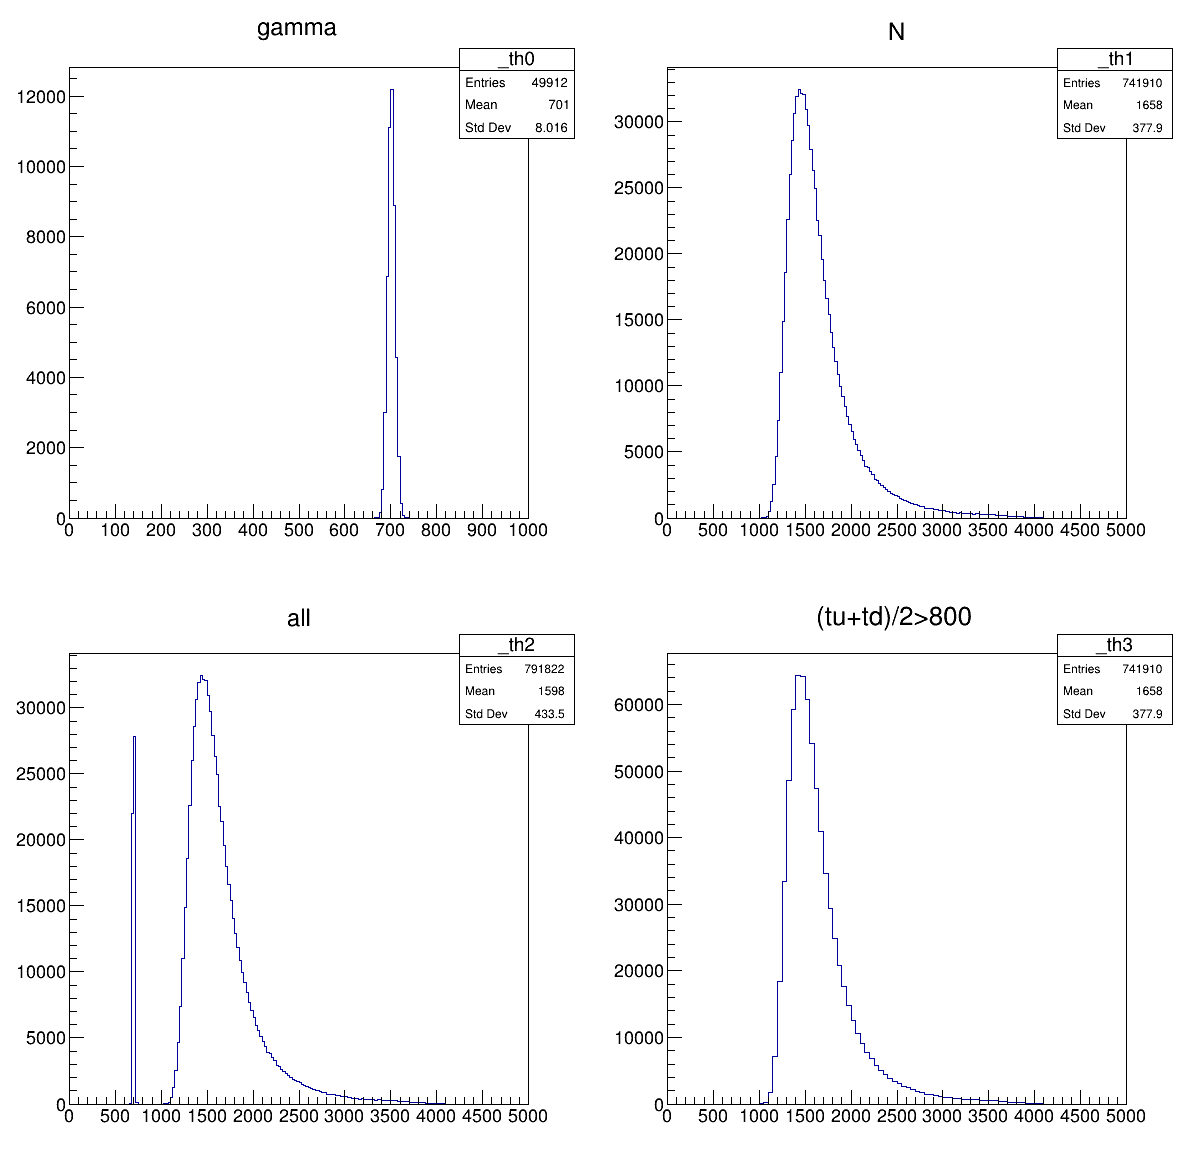

In [7]:
TH1D *_th0 = new TH1D("_th0", "gamma", 200, 0, 1000); 
TH1D *_th1 = new TH1D("_th1", "N", 200, 0, 5000); 
TH1D *_th2 = new TH1D("_th2", "all", 200, 0, 5000); 
TH1D *_th3 = new TH1D("_th3", "(tu+td)/2>800", 100, 0, 5000); 

Double_t tutd; 
for(Long64_t jentry = 0; jentry < Nentry; jentry++){
    vetotree->GetEntry(jentry); 
    if(itu!=4095 && itd!= 4095 && veto_itu == 4095 &&veto_itd ==4095 ){
        tutd = (itd+Double_t(itu))/2; 
        if(pid==0){
            _th0->Fill(tutd); 
        }
        if(pid==1){
            _th1->Fill(tutd); 
        }
        _th2->Fill(tutd); 
        if(tutd>800){
            _th3->Fill(tutd); 
        }
    }
}

TCanvas *qc2 = new TCanvas("qc2", "qc2", 1200, 1200); 
qc2->Divide(2,2); 
qc2->cd(1); 
_th0->Draw();
qc2->cd(2); 
_th1->Draw(); 
qc2->cd(3); 
_th2->Draw();
qc2->cd(4); 
_th3->Draw();
qc2->Draw(); 

# 从上图可以知道，筛选出了741910个中子，可以算一下筛选出来的粒子和中子的重合程度。

In [8]:
Double_t NUM_1 = 0; 
for(Long64_t i = 0; i<Nentry; i++){
    vetotree->GetEntry(i); 
    if(itu != 4095 && itd != 4095 && (itu+Double_t(itd))/2>800 && pid == 1 && veto_itu == 4095 && veto_itd == 4095){
        NUM_1 += 1; 
    }
}

Double_t NUM_2 = 0; 
for(Long64_t i = 0; i<Nentry; i++){
    vetotree->GetEntry(i); 
    if(itu != 4095 && itd != 4095 && (itu+Double_t(itd))/2>800 && veto_itu == 4095 && veto_itd == 4095){
        NUM_2 += 1; 
    }
}

std::cout<<"输出粒子中的中子数"<<NUM_1<<std::endl; 

std::cout<<"重合程度"<<NUM_1/NUM_2*100<<"%"<<std::endl; 

输出粒子中的中子数741910
重合程度100%


# 由此可以得到最低重合程度为100%，且只略去了真实时间不明的itu,itd=4095的粒子。

# 用二维图进行更详细的观察

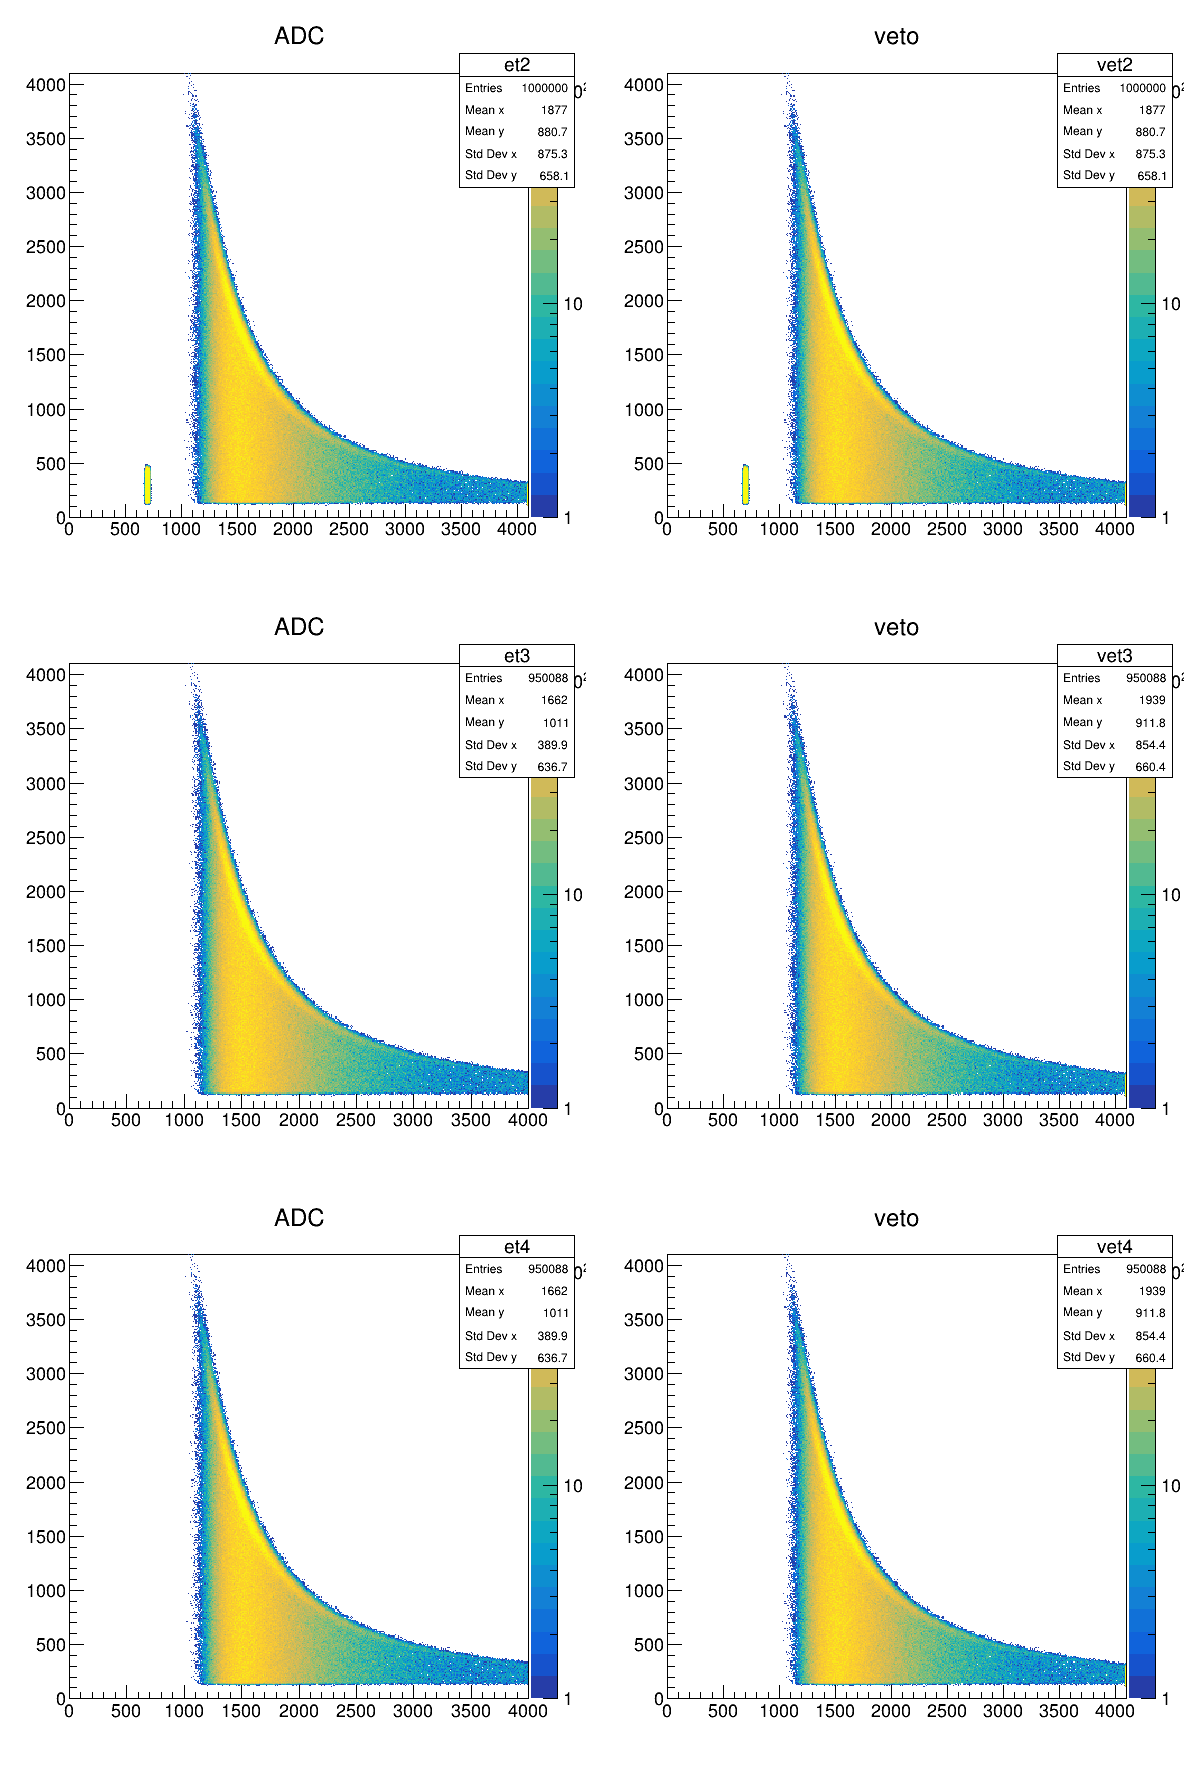

In [9]:
TCanvas *tqc6 = new TCanvas("tqc6", "tqc6", 1200, 1800); 
tqc6->Divide(2,3); 

TH2D *vet2 = new TH2D("vet2", "veto", 410, 0, 4100, 410, 0, 4100); 
TH2D *et2 = new TH2D("et2", "ADC", 410, 0, 4100, 410, 0, 4100); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet2", "", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et2" , "", "goff"); 

tqc6->cd(1); 
tqc6 -> cd(1) ->SetLogz(); 
et2 -> Draw("colz"); 
et2->SetMaximum(120); //设置上下限，这样对比比较清晰
et2->SetMinimum(1); 
tqc6->cd(2); 
tqc6 -> cd(2) ->SetLogz(); 
vet2 -> Draw("colz"); 
vet2->SetMaximum(120); //设置上下限，这样对比比较清晰
vet2->SetMinimum(1); 

TH2D *vet3 = new TH2D("vet3", "veto", 410, 00, 4100, 410, 0, 4100); 
TH2D *et3 = new TH2D("et3", "ADC", 410, 0, 4000, 410, 0, 4100); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet3", "pid != 0", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et3" , "pid != 0", "goff"); 

tqc6->cd(3); 
tqc6 -> cd(3) ->SetLogz(); 
et3 -> Draw("colz"); 
et3->SetMaximum(120); //设置上下限，这样对比比较清晰
et3->SetMinimum(1); 
tqc6->cd(4); 
tqc6 -> cd(4) ->SetLogz(); 
vet3 -> Draw("colz"); 
vet3->SetMaximum(120); //设置上下限，这样对比比较清晰
vet3->SetMinimum(1); 

TH2D *vet4 = new TH2D("vet4", "veto", 410, 0, 4100, 410, 0, 4100); 
TH2D *et4 = new TH2D("et4", "ADC", 410, 0, 4000, 410, 0, 4100); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet4", "(itu + itd) / 2 > 800 ", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et4" , "(itu + itd) / 2 > 800 ", "goff"); 

tqc6->cd(5); 
tqc6 -> cd(5) ->SetLogz(); 
et4 -> Draw("colz"); 
et4->SetMaximum(120); //设置上下限，这样对比比较清晰
et4->SetMinimum(1); 
tqc6->cd(6); 
tqc6 -> cd(6) ->SetLogz(); 
vet4 -> Draw("colz"); 
vet4->SetMaximum(120); //设置上下限，这样对比比较清晰
vet4->SetMinimum(1); 
tqc6 ->Draw(); 

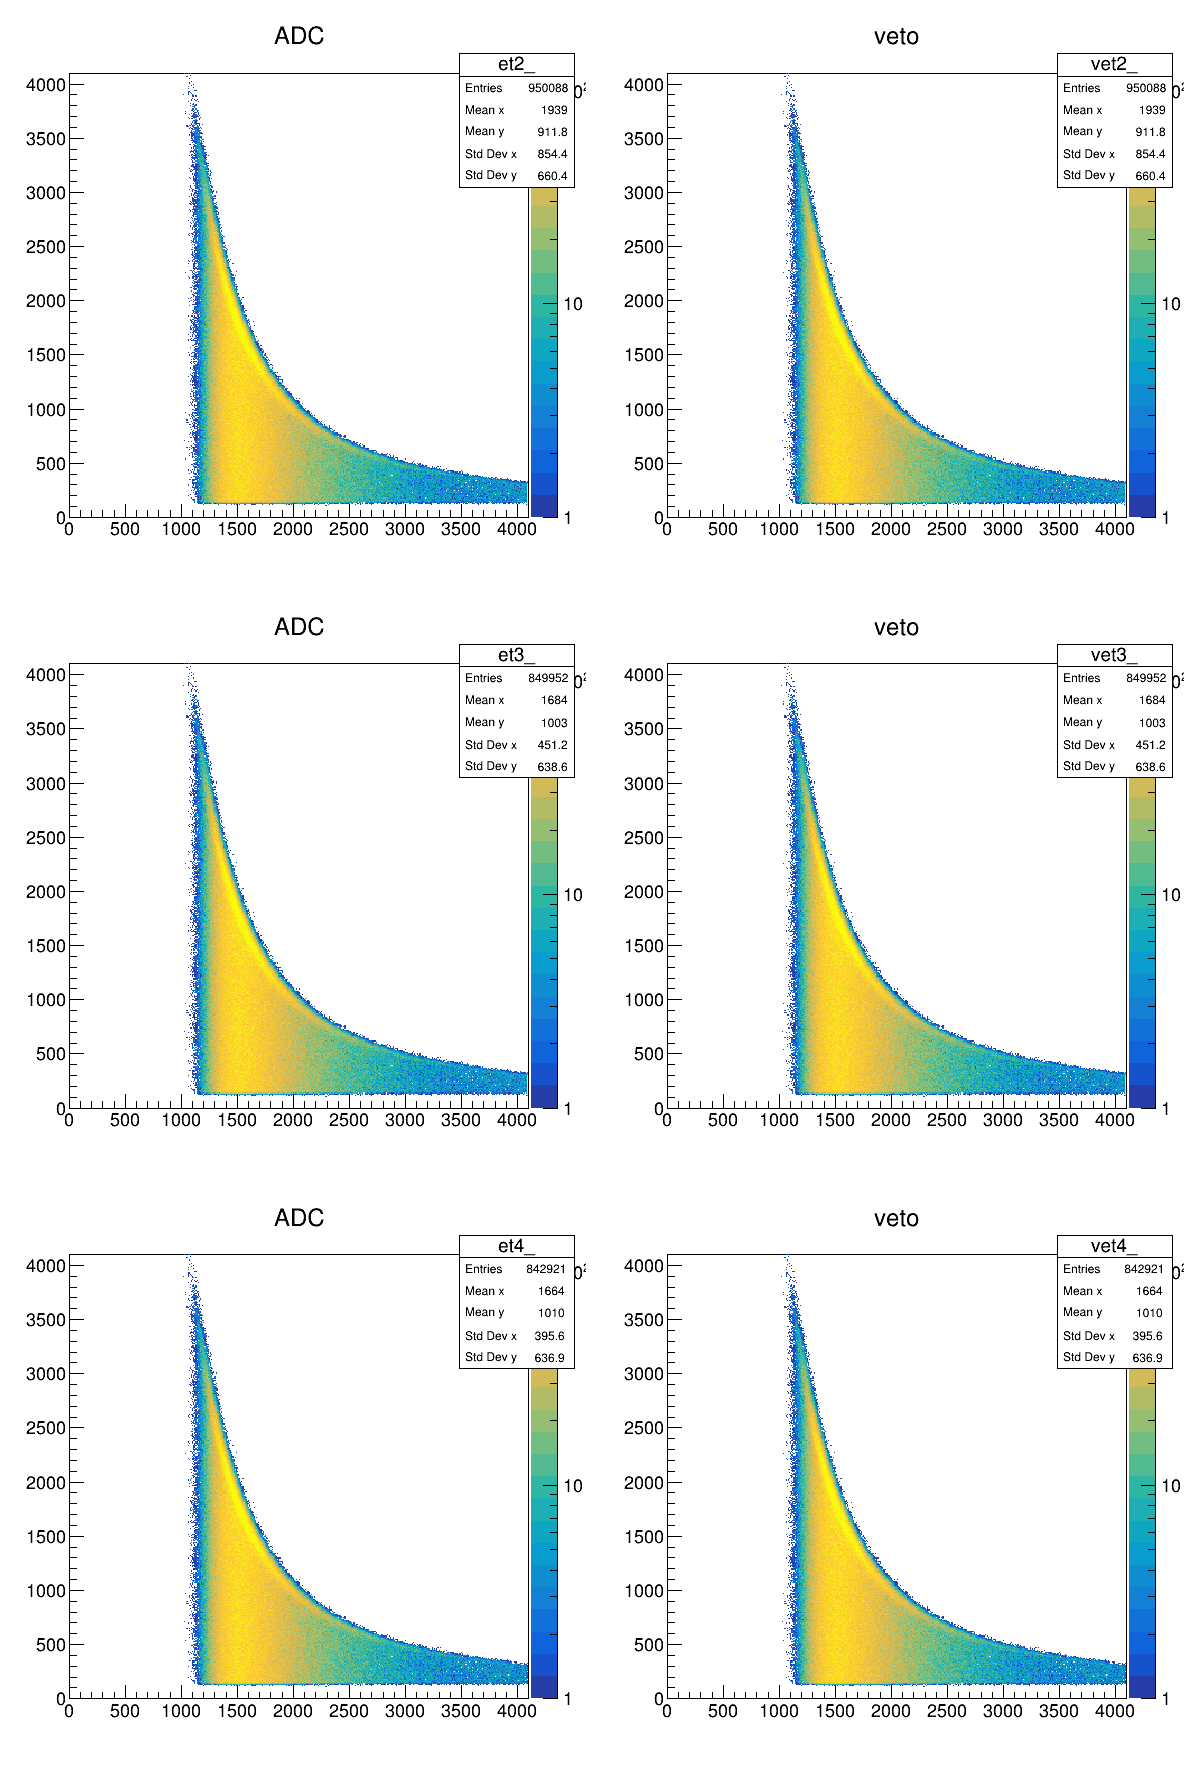

In [10]:
TCanvas *tqc7 = new TCanvas("tqc7", "tqc7", 1200, 1800); 
tqc7->Divide(2,3); 

TH2D *vet2_ = new TH2D("vet2_", "veto", 410,0,4100,410,0,4100); 
TH2D *et2_ = new TH2D("et2_", "ADC", 410,0,4100,410,0,4100); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet2_", "pid != 0", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et2_" , "pid != 0", "goff"); 

tqc7->cd(1); 
tqc7 -> cd(1) ->SetLogz(); 
et2_ -> Draw("colz");
et2_->SetMaximum(120); 
et2_->SetMinimum(1); 
tqc7->cd(2); 
tqc7 -> cd(2) ->SetLogz(); 
vet2_ -> Draw("colz"); 
vet2_->SetMaximum(120); 
vet2_->SetMinimum(1); 

TH2D *vet3_ = new TH2D("vet3_", "veto", 410,0,4100,410,0,4100); 
TH2D *et3_ = new TH2D("et3_", "ADC", 410,0,4100,410,0,4100); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet3_", "pid != 0 && pid != 3", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et3_" , "pid != 0 && pid != 3", "goff"); 

tqc7->cd(3); 
tqc7 -> cd(3) ->SetLogz();  
et3_ -> Draw("colz"); 
et3_->SetMaximum(120); 
et3_->SetMinimum(1); 
tqc7->cd(4); 
tqc7 -> cd(4) ->SetLogz(); 
vet3_ -> Draw("colz"); 
vet3_->SetMaximum(120); 
vet3_->SetMinimum(1); 

TH2D *vet4_ = new TH2D("vet4_", "veto", 410,0,4100,410,0,4100); 
TH2D *et4_ = new TH2D("et4_", "ADC", 410,0,4100,410,0,4100); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet4_", "(itu + itd) / 2 > 800 && itu != 4095", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et4_" , "(itu + itd) / 2 > 800 && itu != 4095", "goff"); 

tqc7->cd(5); 
tqc7 -> cd(5) ->SetLogz(); 
et4_ -> Draw("colz"); 
et4_->SetMaximum(120); 
et4_->SetMinimum(1); 
tqc7->cd(6); 
tqc7 -> cd(6) ->SetLogz(); 
vet4_ -> Draw("colz"); 
vet4_->SetMaximum(120); 
vet4_->SetMinimum(1); 

tqc7 ->Draw(); 

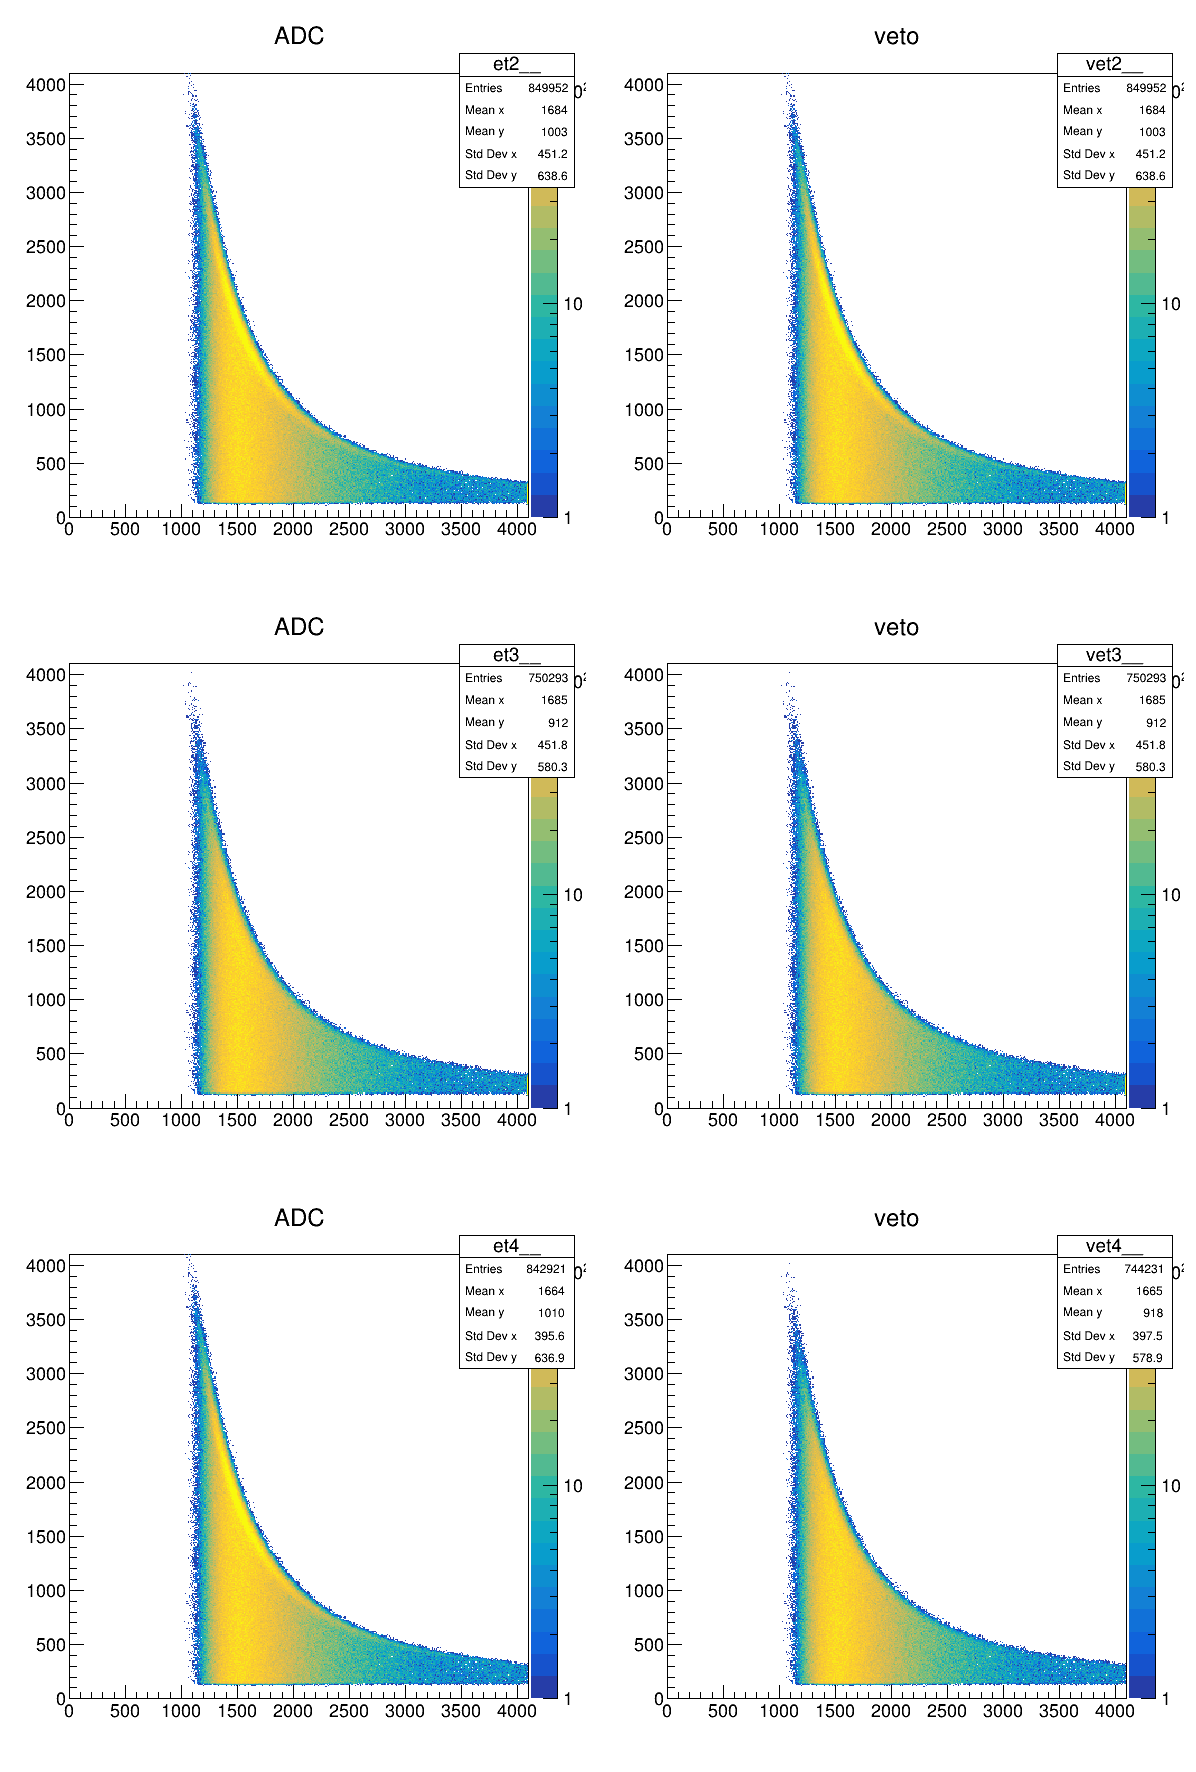

In [11]:
TCanvas *tqc8 = new TCanvas("tqc8", "tqc8", 1200, 1800); 
tqc8->Divide(2,3); 

TH2D *vet2__ = new TH2D("vet2__", "veto", 410,0,4100,410,0,4100); 
TH2D *et2__ = new TH2D("et2__", "ADC", 410,0,4100,410,0,4100); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet2__", "pid != 0 && pid != 3", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et2__" , "pid != 0 && pid != 3", "goff"); 

tqc8 ->cd(1); 
et2__ -> Draw("colz");
et2__->SetMaximum(120); 
et2__->SetMinimum(1); 
tqc8 -> cd(1) ->SetLogz(); 
tqc8->cd(2); 
tqc8 -> cd(2) ->SetLogz(); 
vet2__ -> Draw("colz"); 
vet2__->SetMaximum(120); 
vet2__->SetMinimum(1); 

TH2D *vet3__ = new TH2D("vet3__", "veto", 410,0,4100,410,0,4100); 
TH2D *et3__ = new TH2D("et3__", "ADC", 410,0,4100,410,0,4100); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet3__", "pid != 0 && pid != 2 && pid != 3", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et3__" , "pid != 0 && pid != 2 && pid != 3", "goff"); 

tqc8->cd(3); 
tqc8 -> cd(3) ->SetLogz(); 
et3__ -> Draw("colz"); 
et3__->SetMaximum(120); 
et3__->SetMinimum(1); 
tqc8->cd(4); 
tqc8 -> cd(4) ->SetLogz(); 
vet3__ -> Draw("colz"); 
vet3__->SetMaximum(120); 
vet3__->SetMinimum(1); 

TH2D *vet4__ = new TH2D("vet4__", "veto", 410,0,4100,410,0,4100); 
TH2D *et4__ = new TH2D("et4__", "ADC", 410,0,4100,410,0,4100); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet4__", "(itu + itd) / 2 > 800 && itu != 4095 && veto_itu == 4095", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et4__" , "(itu + itd) / 2 > 800 && itu != 4095", "goff");  //无法进一步筛选

tqc8->cd(5); 
tqc8 -> cd(5) ->SetLogz(); 
et4__ -> Draw("colz"); 
et4__->SetMaximum(120); 
et4__->SetMinimum(1); 

tqc8->cd(6); 
tqc8 -> cd(6) ->SetLogz(); 
vet4__ -> Draw("colz"); 
vet4__->SetMaximum(120); 
vet4__->SetMinimum(1); 
tqc8->Draw(); 

# 部分中子也被删除了，不过这部分数据本就不能使用，他们已经超过了时间限，无法确定具体时间

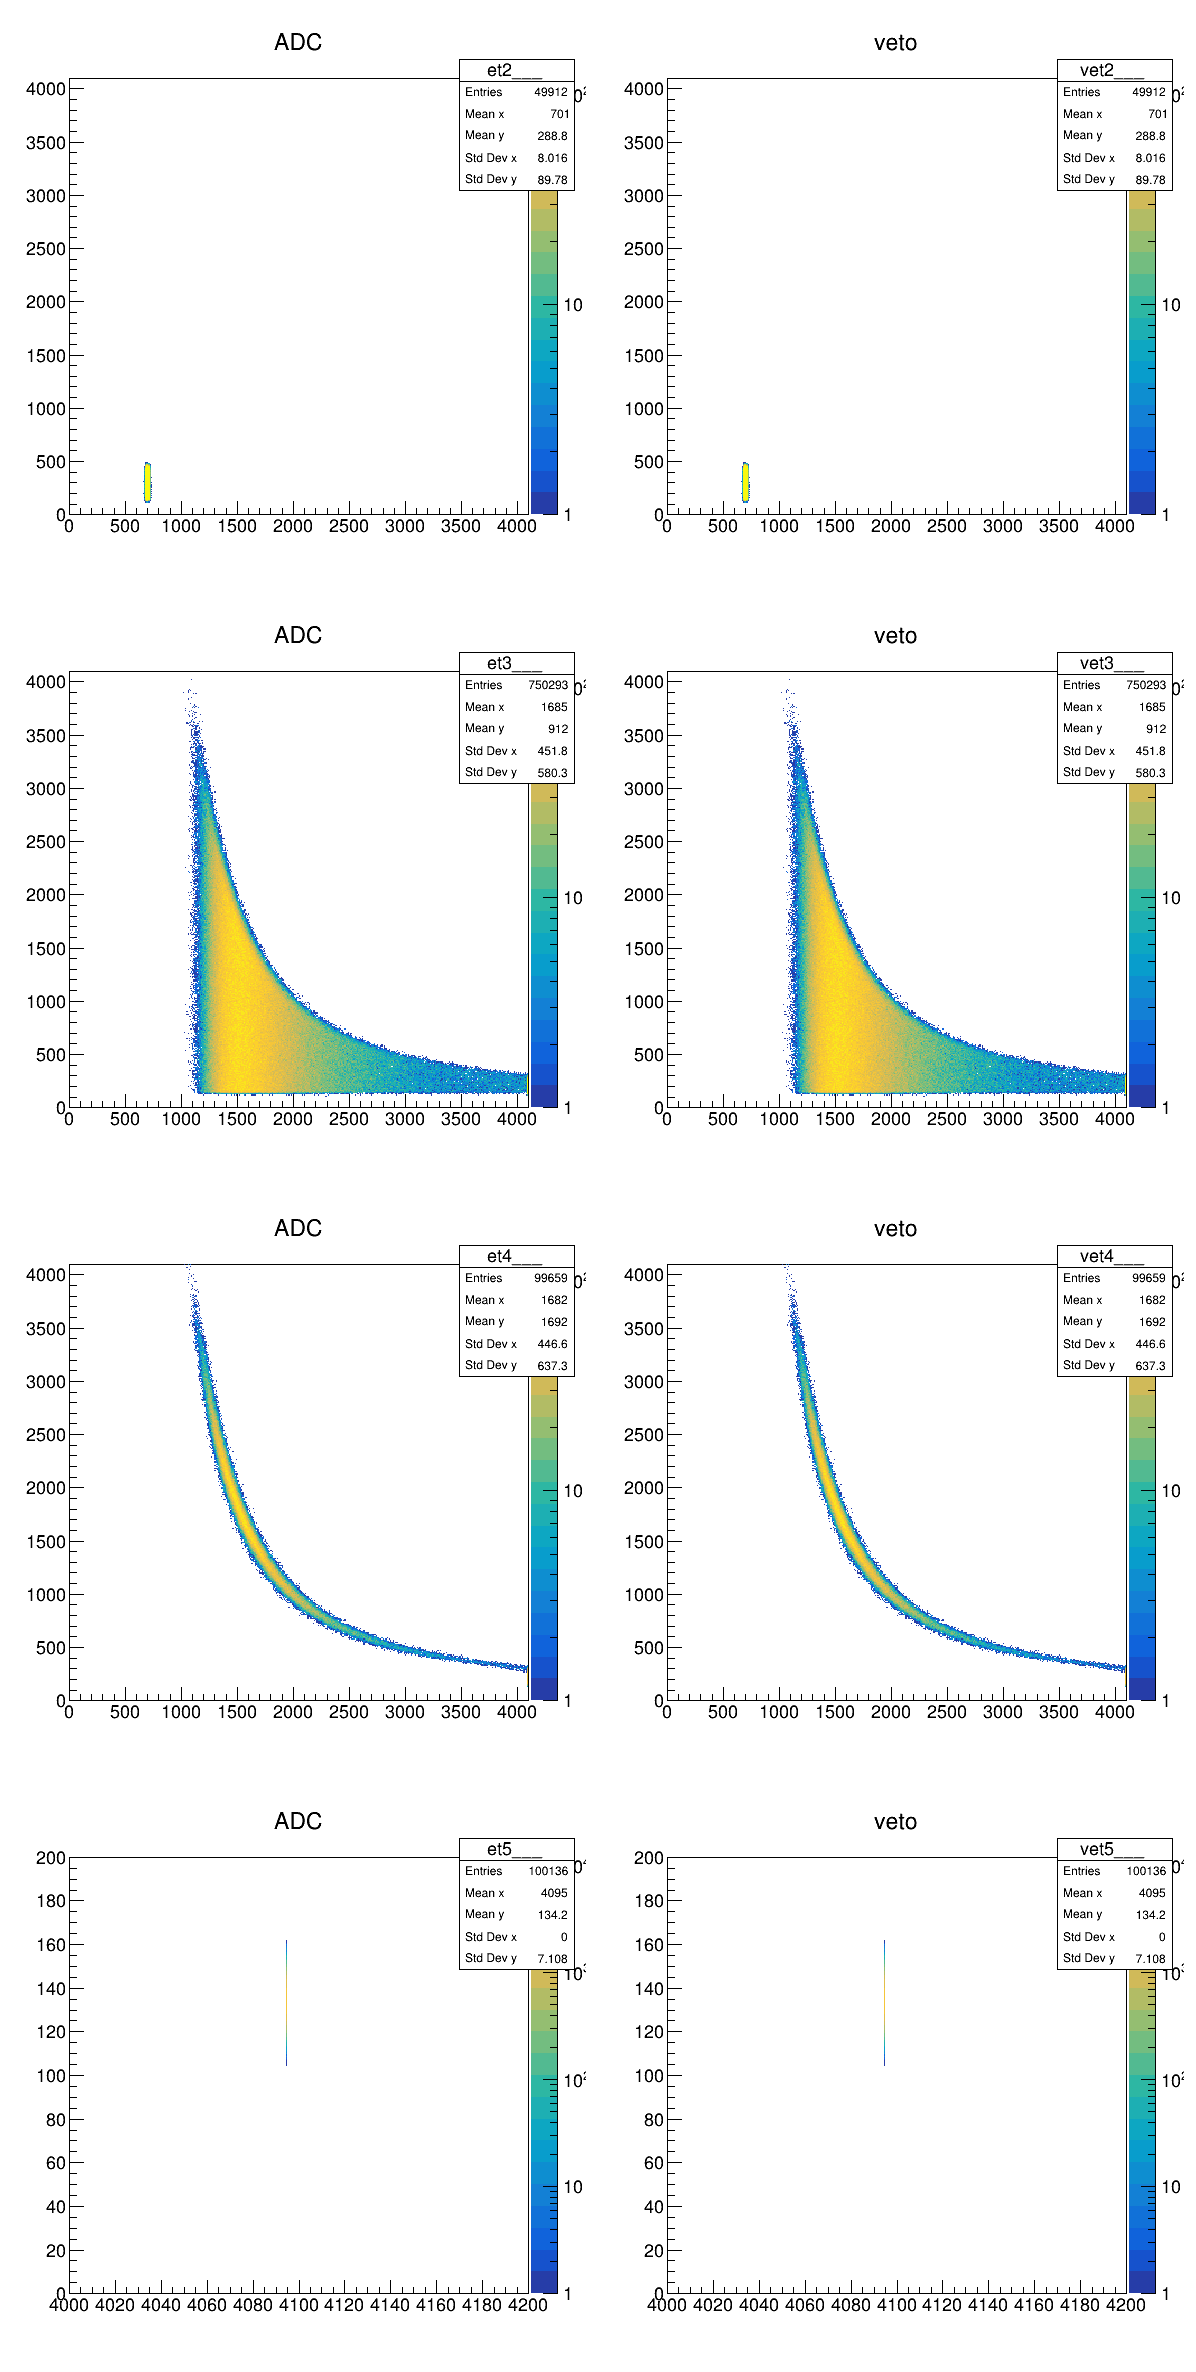

Warning in <TCanvas::Constructor>: Deleting canvas with same name: tqc9
Warning in <TFile::Append>: Replacing existing TH1: vet2___ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: et2___ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: vet3___ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: et3___ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: vet4___ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: et4___ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: vet5___ (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: et5___ (Potential memory leak).


In [16]:
TCanvas *tqc9 = new TCanvas("tqc9", "tqc9", 1200, 2400); 
tqc9->Divide(2,4); 

TH2D *vet2___ = new TH2D("vet2___", "veto", 410,0,4100,410,0,4100); 
TH2D *et2___ = new TH2D("et2___", "ADC", 410,0,4100,410,0,4100); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet2___", "pid == 0", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et2___" , "pid == 0", "goff"); 

tqc9 ->cd(1); 
et2___ -> Draw("colz");
et2___->SetMaximum(120); 
et2___->SetMinimum(1); 
tqc9 -> cd(1) ->SetLogz(); 
tqc9 -> cd(2); 
tqc9 -> cd(2) ->SetLogz(); 
vet2___ -> Draw("colz"); 
vet2___->SetMaximum(120); 
vet2___->SetMinimum(1); 

TH2D *vet3___ = new TH2D("vet3___", "veto", 410,0,4100,410,0,4100); 
TH2D *et3___ = new TH2D("et3___", "ADC", 410,0,4100,410,0,4100); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet3___", "pid == 1", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et3___" , "pid == 1", "goff"); 

tqc9->cd(3); 
tqc9 -> cd(3) ->SetLogz(); 
et3___ -> Draw("colz"); 
et3___->SetMaximum(120); 
et3___->SetMinimum(1); 
tqc9 -> cd(4); 
tqc9 -> cd(4) ->SetLogz(); 
vet3___ -> Draw("colz"); 
vet3___->SetMaximum(120); 
vet3___->SetMinimum(1); 

TH2D *vet4___ = new TH2D("vet4___", "veto", 410,0,4100,410,0,4100); 
TH2D *et4___ = new TH2D("et4___", "ADC", 410,0,4100,410,0,4100); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet4___", "pid == 2", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et4___" , "pid == 2", "goff");  //无法进一步筛选

tqc9->cd(5); 
tqc9 -> cd(5) ->SetLogz(); 
et4___ -> Draw("colz"); 
et4___->SetMaximum(120); 
et4___->SetMinimum(1); 

tqc9 -> cd(6); 
tqc9 -> cd(6) ->SetLogz(); 
vet4___ -> Draw("colz"); 
vet4___->SetMaximum(120); 
vet4___->SetMinimum(1); 

TH2D *vet5___ = new TH2D("vet5___", "veto", 410,4000,4200,410,0,200); 
TH2D *et5___ = new TH2D("et5___", "ADC", 410,4000,4200,410,0,200); 

vetotree -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> vet5___", "pid == 3", "goff"); 
t.fChain -> Draw("TMath::Sqrt(iqu*iqd) : (itu + itd) / 2 >> et5___" , "pid == 3", "goff");  //无法进一步筛选

tqc9 -> cd(7); 
tqc9 -> cd(7) ->SetLogz(); 
et5___ -> Draw("colz"); 
et5___->SetMaximum(12000); 
et5___->SetMinimum(1); 

tqc9->cd(8); 
tqc9 -> cd(8) ->SetLogz(); 
vet5___-> Draw("colz"); 
vet5___->SetMaximum(12000); 
vet5___->SetMinimum(1); 
tqc9->Draw(); 